
### 1. Análisis Exploratorio de Datos (EDA)

En esta sección, analizaremos el conjunto de datos para identificar relaciones entre variables, valores atípicos y tendencias. Esto incluye visualizaciones como histogramas, diagramas de caja y matrices de correlación.


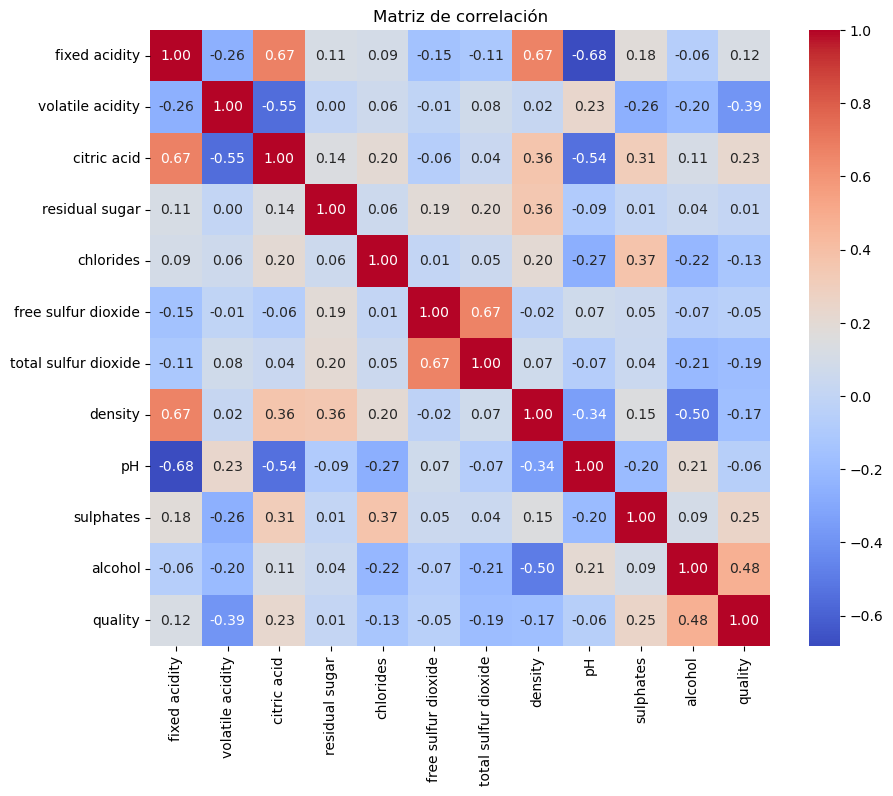

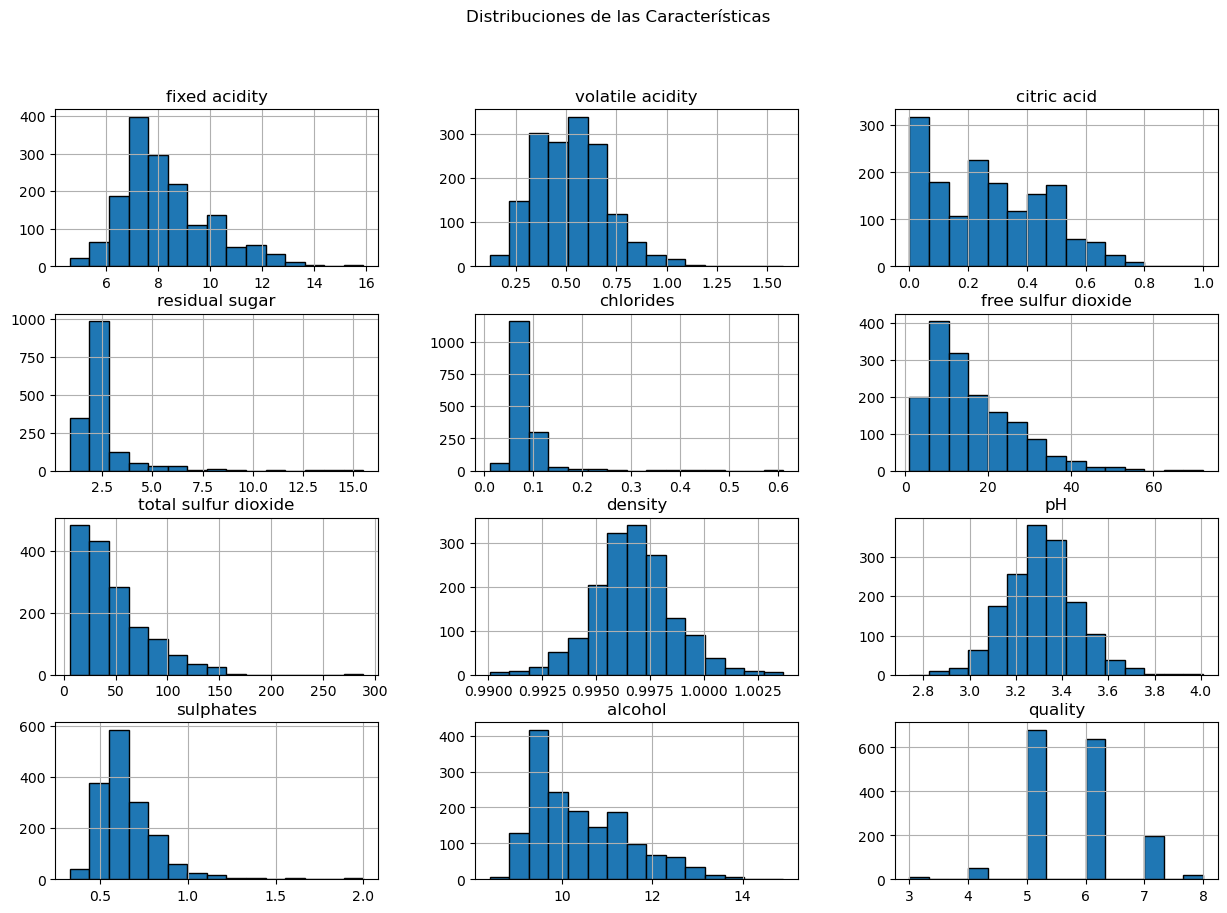

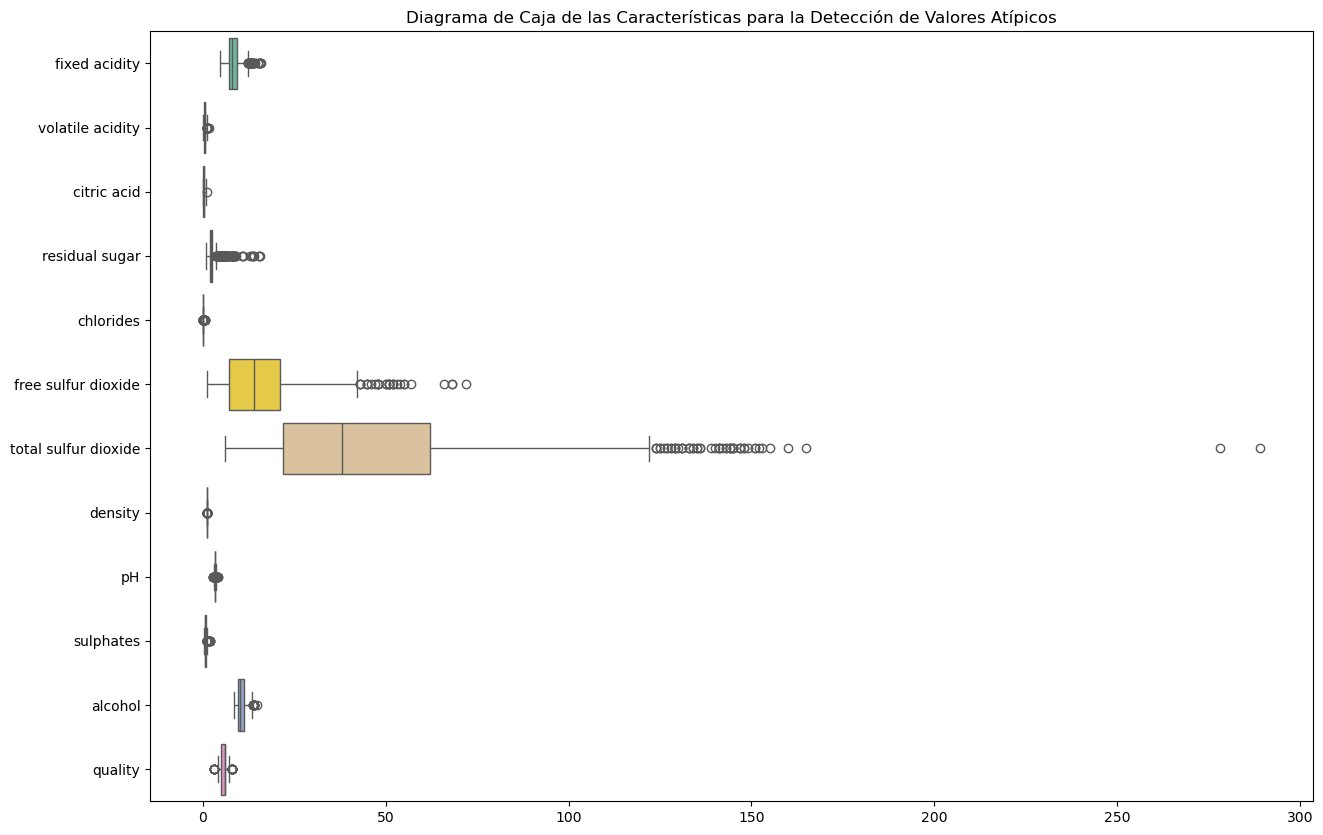

In [33]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el conjunto de datos
df = pd.read_csv('winequality-red.csv')

# Mostrar las primeras filas del conjunto de datos
df.head()

# Estadísticas resumidas
df.describe()

# Verificar valores faltantes
df.isnull().sum()

# Matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Histogramas para cada característica
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribuciones de las Características")
plt.show()

# Diagramas de caja para la detección de valores atípicos
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Diagrama de Caja de las Características para la Detección de Valores Atípicos")
plt.show()



### 2. Preprocesamiento de datos

Limpiamos los datos, manejamos los valores faltantes (si los hay) y normalizamos o transformamos características según sea necesario.


In [36]:

# Llenar valores faltantes si los hay (aunque no se espera que haya ninguno en este conjunto de datos)
df.fillna(df.mean(), inplace=True)

# Normalizar características numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = df.columns[:-1]  # Exclude the target variable 'quality'
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Mostrar los datos transformados
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5



### 3. Selección de características

Identificaremos las características más relevantes para predecir la calidad del vino utilizando la importancia de las características de un clasificador de árbol de decisión.


In [39]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Separar características y objetivo
X = df.drop('quality', axis=1)
y = df['quality']

# Aplicar SelectKBest para extraer las principales características
selector = SelectKBest(score_func=f_classif, k=5)  # Adjust k as desired
X_selected = selector.fit_transform(X, y)

# Obtener nombres de características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')



### 4. Train-Test Split

Dividiremos el conjunto de datos en conjuntos de train y test para evaluar el rendimiento del modelo.

In [43]:

# Dividir los datos en conjuntos de training y testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)



### 5. Entrenamiento del Modelo

Entrenaremos un Clasificador de Árbol de Decisión y ajustaremos los hiperparámetros utilizando GridSearchCV para mejorar el rendimiento.


In [46]:

from sklearn.model_selection import GridSearchCV

# Definir el modelo
dt_model = DecisionTreeClassifier(random_state=42)

# Configurar la cuadrícula de hiperparámetros para ajuste
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda en cuadrícula para los mejores hiperparámetros
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
print("Mejores parámetros del modelo:", grid_search.best_params_)


Mejores parámetros del modelo: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}



### 6. Evaluación del Modelo

Evaluaremos el modelo en el conjunto de prueba utilizando accuracy, precision, recall, y F1-score.


Accuracy: 0.578125
Precision: 0.5679535128546098
Recall: 0.578125
F1-score: 0.5726892907812984
Classification Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.67      0.69      0.68       130
           6       0.58      0.56      0.57       132
           7       0.45      0.50      0.47        42
           8       0.00      0.00      0.00         5

    accuracy                           0.58       320
   macro avg       0.28      0.29      0.29       320
weighted avg       0.57      0.58      0.57       320



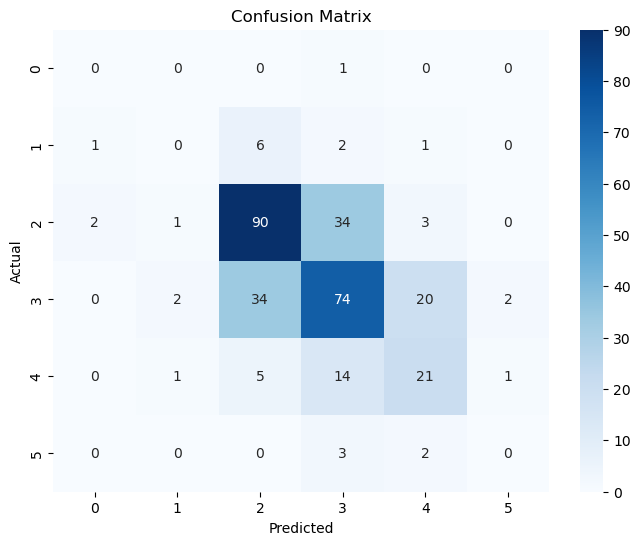

In [49]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

# Informe de clasificación
print('Classification Report:', classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()



### 7. Visualizaciones

Esta sección incluye varios gráficos para visualizar los resultados del modelo y las importancias de las características.

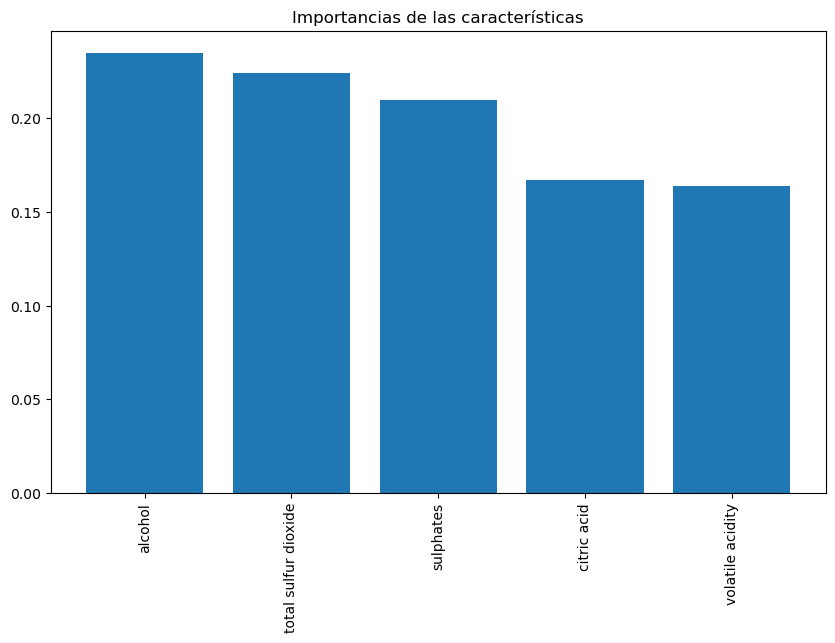

In [52]:

# Importancias de las características
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Importancias de las características")
plt.bar(range(X_selected.shape[1]), importances[indices], align="center")
plt.xticks(range(X_selected.shape[1]), [selected_features[i] for i in indices], rotation=90)
plt.show()



### 8. Interpretación de Resultados y Documentación

En esta sección, interpretamos el rendimiento del modelo basado en accuracy, precision, recall, y F1-score.
El Clasificador de Árbol de Decisión fue ajustado para un rendimiento óptimo, proporcionando los siguientes conocimientos:

1. **Rendimiento del Modelo**:
    - **Accuracy** proporciona el porcentaje de predicciones correctas sobre el total de predicciones. En este caso, nuestra precisión indica la confiabilidad general del modelo en predecir la calidad del vino.
    - **Precision** mide la calidad de las predicciones positivas. Una alta precisión indica que la mayoría de las predicciones para un nivel de calidad específico fueron correctas.
    - **Recall** muestra la capacidad del modelo para identificar todos los positivos reales. Un mayor recall en este contexto significa que el modelo captura la mayoría de los vinos de una cierta calidad.
    - **F1-score** equilibra la precisión y la recuperación, proporcionando una única medida del rendimiento de clasificación en todas las clases.

2. **Matriz de Confusión**:
    - La matriz de confusión proporciona información más profunda sobre qué niveles de calidad se predicen bien y dónde el modelo tiene dificultades, ayudando a identificar cualquier mala clasificación o sesgos en el modelo.

3. **Importancia de las Características**:
    - El gráfico de importancia de las características indica qué propiedades químicas influyen más en la calidad del vino. Las características con puntuaciones de importancia más altas son críticas para predecir la calidad y pueden servir como puntos focales para estudios o ajustes adicionales.

4. **Observaciones Finales**:
    - Aunque el modelo tiene un rendimiento adecuado, posibles mejoras podrían involucrar probar otros algoritmos de clasificación o ajustes adicionales. Regularizar la profundidad del árbol, el número mínimo de muestras para divisiones y otros hiperparámetros también podría ayudar a mitigar el sobreajuste y mejorar la generalización.
